1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy import fftpack
from scipy.integrate import quad, quadrature

probability of observing 15 or more hurricanes is 1-p(1)-p(2)-....p(14)
From poisson statistic one finds that the probability of observing 15 or more hurricanes is  0.002217122790073356
The test is one tail since the gaussian is cut off at negative values
So far we have evaluated the probability of having results equal to or less compatible (assuming true the null hypothesis).
This is the definition of the p value.
Now to connect the Z with the pvalue ona can use the tables. However in this case the gaussian is cut off since no negative values are allowed.
So firstly one needs to remove the part of the gaussian below 0


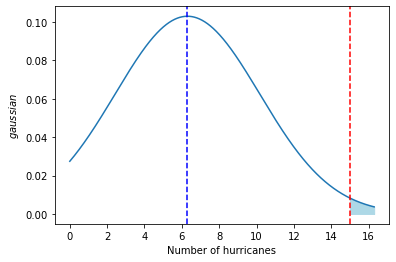

In [35]:
## from math import sqrt, pi, erf



#probability of observing 15 or more hurricane is 1-p(1)-p(2)-....p(14)

x0=15
mu=6.3
sigma=np.sqrt(15)

#prob of having n or less hurricanes:
cumulative=0
for i in range(x0):
    cumulative=cumulative+np.exp(-mu)*mu**(i)/np.math.factorial(i)
print("probability of observing 15 or more hurricanes is 1-p(1)-p(2)-....p(14)")  
print("From poisson statistic one finds that the probability of observing 15 or more hurricanes is ",1-cumulative)
print("The test is one tail since the gaussian is cut off at negative values")
print('''So far we have evaluated the probability of having results equal to or less compatible (assuming true the null hypothesis).
This is the definition of the p value.
Now to connect the Z with the pvalue ona can use the tables. However in this case the gaussian is cut off since no negative values are allowed.
So firstly one needs to remove the part of the gaussian below 0''')


#print("The Z score is ",np.abs(x0-mu)/sigma)



# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(0, mu + 10, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=(x>x0), color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='blue')
plt.ylabel("$gaussian$")
plt.xlabel("Number of hurricanes")
plt.show()

Normalization of the gaussian to find correspondence between Z and p-value
integral of the non normalized gaus:  0.9480945925243924
integral of the normalized gauss in the highlighted part:  0.0014238010028470513


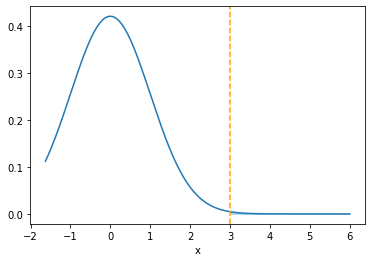

p-value = 0.0014238010028470513
The probability we found was  0.002217122790073356
So our p-value is greater than the area under the normalized cut gaussian,hence we cannot conclude this is significantly different


In [36]:

xs = np.linspace((0-mu)/sigma, +6, 10000)
ts = stats.norm.pdf(xs) #yvalues
print("Normalization of the gaussian to find correspondence between Z and p-value")
result = quad(lambda x: 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(x-mu)**2/sigma**2), 0, np.inf)
print("integral of the non normalized gaus: ",result[0])
ts=ts/result[0]

#Here I find the level of significance connected to Z=3
s = quad(lambda x: 1/(np.sqrt(2*np.pi)*result[0])*np.exp(-0.5*(x)**2), 3, np.inf)
print("integral of the normalized gauss in the highlighted part: ",s[0])

plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > 3, color='lightblue')
#plt.axvline(Z, linestyle='--', color='orange')#
plt.axvline(3, linestyle='--', color='orange')#
plt.ylabel("")
plt.xlabel("x")
plt.show()
print("p-value =", s[0])
print("The probability we found was ",1-cumulative)
print("So our p-value is greater than the area under the normalized cut gaussian,hence we cannot conclude this is significantly different")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


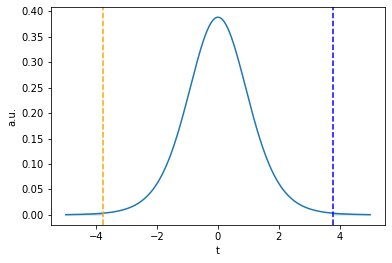

p-value = 0.004302464132864604
Since the p-value is <  𝛼/2 we reject thu null hypothesis
The change in blood pressures within our sample was statistically significant.


In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma_pre = np.sqrt(np.var(pre, ddof=1)) 
sigma_post = np.sqrt(np.var(post, ddof=1))
mean_pre = np.mean(pre) 
mean_post = np.mean(post) 

total_sigma=np.sqrt(sigma_pre**2+sigma_post**2)
n = len(pre) 
w = mean_pre - mean_post


T = w / (total_sigma / np.sqrt(n))
print("T =", T)



xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)


plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')

plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("Since the p-value is <  𝛼/2 we reject thu null hypothesis\nThe change in blood pressures within our sample was statistically significant.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

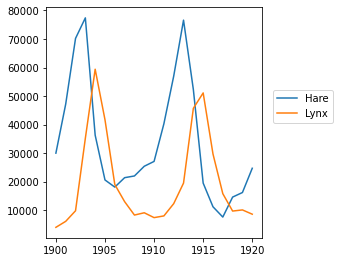

In [5]:

data = np.loadtxt('data/populations.txt') #data are taken as rows
year, hares, lynxes, carrots = data.T

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'), loc=(1.05, 0.5))
#!cat data/populations.txt

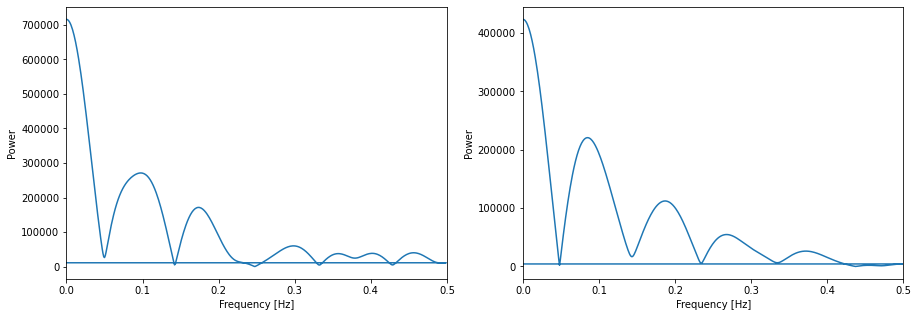


HARES

Peak frequency: 0.098
Peak frequency: 0.174
Apart from a zero frequency (corresponds to a constant so a signal with non zero mean) two other peaks are relevant for the analysis

LYNXES

Peak frequency: 0.085
Peak frequency: 0.187
Apart from a zero frequency (corresponds to a constant so a signal with non zero mean) two other peaks are relevant for the analysis



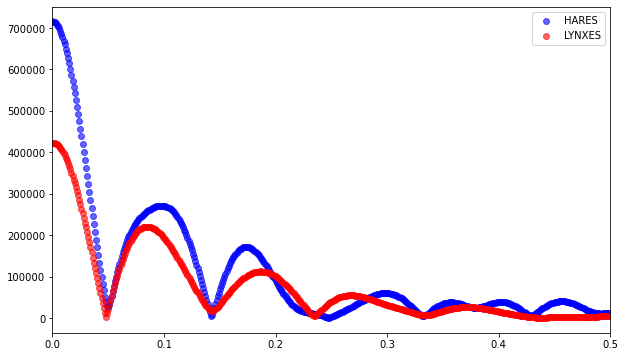

The correlation between the variables is confirmed by the periodicity analysis


In [6]:
#Perform fft of the two data
hares_fft = fftpack.fft(hares,n=1000)
lynxes_fft = fftpack.fft(lynxes,n=1000)

power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)

#frequencies
freq_hares = fftpack.fftfreq(hares_fft.size, d=1.)
freq_lynxes = fftpack.fftfreq(hares_fft.size, d=1.)


# Plot the FFT power
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(freq_hares, power_hares)
axs[0].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Power')
axs[0].set_xlim([0,0.5])

axs[1].plot(freq_lynxes, power_lynxes)
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Power')
axs[1].set_xlim([0,0.5])
plt.show()

#HARES
print("\nHARES\n")
#inline mask for freq>0
peak_freq = freq_hares[np.where(freq_hares> 0.06)][power_hares[np.where(freq_hares > 0.06)].argmax()]
print("Peak frequency:", peak_freq)


#inline mask for freq>0.15 (second peak)
peak_freq = freq_hares[np.where(freq_hares> 0.15)][power_hares[np.where(freq_hares > 0.15)].argmax()]
print("Peak frequency: %.3f"% peak_freq)

print("Apart from a zero frequency (corresponds to a constant so a signal with non zero mean) two other peaks are relevant for the analysis")


#LYNXES
print("\nLYNXES\n")
#inline mask for freq>0
peak_freq_l = freq_lynxes[np.where(freq_lynxes> 0.06)][power_lynxes[np.where(freq_lynxes > 0.06)].argmax()]
print("Peak frequency:", peak_freq_l)


#inline mask for freq>0.15 (second peak)
peak_freq_l = freq_lynxes[np.where(freq_lynxes> 0.15)][power_lynxes[np.where(freq_lynxes > 0.15)].argmax()]
print("Peak frequency:", peak_freq_l)

print("Apart from a zero frequency (corresponds to a constant so a signal with non zero mean) two other peaks are relevant for the analysis")
print()


#Compare two signals
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=freq_hares, y=power_hares, marker='o', c='blue', label="HARES",alpha=0.6)
ax.scatter(x=freq_lynxes, y=power_lynxes, marker='o', c='red', label="LYNXES",alpha=0.6)
ax.legend(loc='best')
ax.set_xlim([0, 0.5])
#ax.set_ylim([-20, 35])
plt.show()

print("The correlation between the variables is confirmed by the periodicity analysis")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

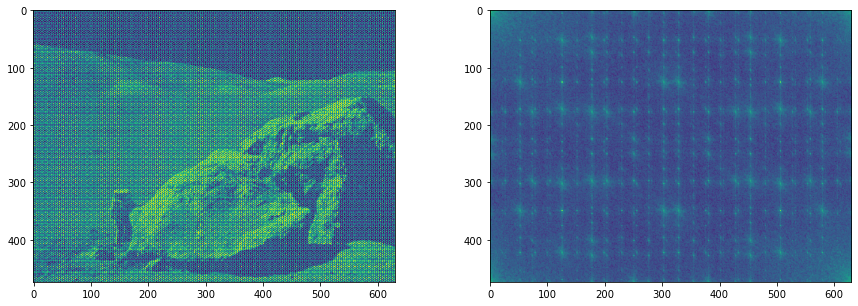

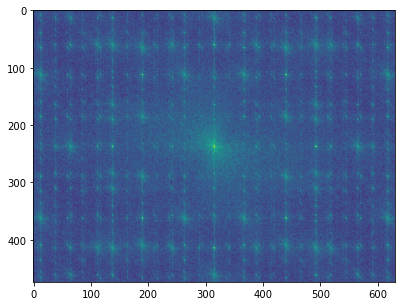

In [7]:
from matplotlib.colors import LogNorm
#find a method to do a 2dimensional fast fourier trasnform
#then plot the 2d result lognorm

#image reading
image=plt.imread("moonlanding.png")

#perform fft
fft2=np.fft.fft2(image)

radius = np.abs(fft2)
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].imshow(image)
axs[1].imshow(radius, norm=LogNorm(vmin=2))
plt.show()

#shift to the center
fft_img_shift = np.fft.fftshift(fft2)
#fft_img_shift=fft2
# extract modulus and phase
radius = np.abs(fft_img_shift)
phases = np.angle(fft_img_shift)

fig, axs = plt.subplots(figsize=(15,5))
axs.imshow(radius, norm=LogNorm(vmin=2))
plt.show()


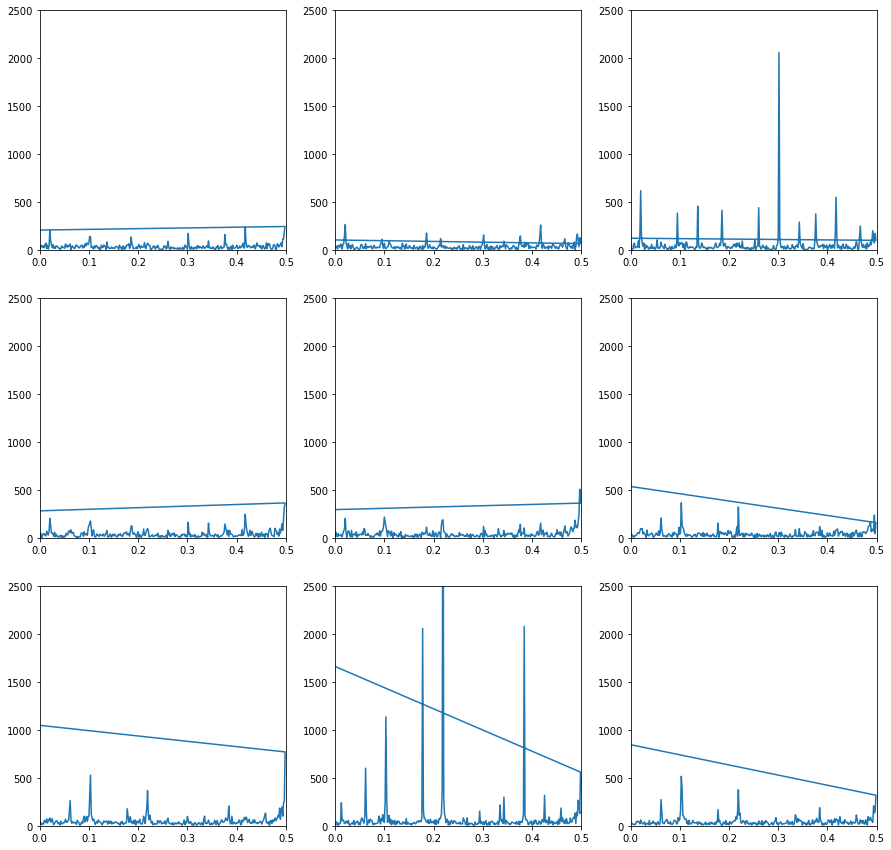

In [8]:
#power = np.abs(fft2)
freq_x = fftpack.fftfreq(radius[0].size, d=1.)
radius = np.abs(fft_img_shift)
#plotting some spectra
N=3
fig, axs = plt.subplots(N,N,figsize=(15,15))
for i in range(N):
    for j in range (N):
        axs[i,j].plot(freq_x,radius[i*N+j+6])
        axs[i,j].set_xlim(0,0.5)
        axs[i,j].set_ylim(0.,2500)
#axs[1].plot(freq_x,power[1])
#axs[1].set_xlim(0.,0.5)
#axs[1].set_ylim(0.,9000)

plt.show()
#print(type(freq_x),type(power[0]))
#print(freq_x.size,power[0].size)




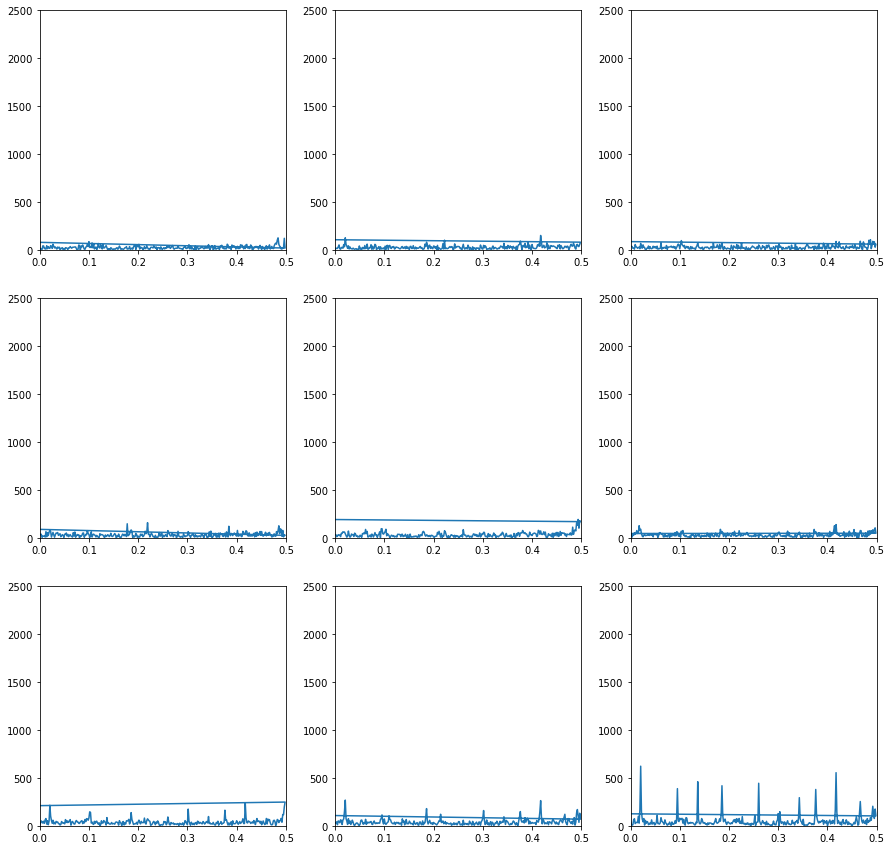

In [9]:
radius = np.abs(fft_img_shift)
for j in range(radius.shape[0]):
    freq_x = fftpack.fftfreq(radius[j].size, d=1.)
    for i in range(radius[j].size):
        if radius[j][i]>1500 and np.abs(freq_x[i])>0.1:
            radius[j][i]=0
            #print(j)
        


fig, axs = plt.subplots(N,N,figsize=(15,15))
for i in range(N):
    for j in range (N):
        axs[i,j].plot(freq_x,radius[i*N+j])
        axs[i,j].set_xlim(0,0.5)
        axs[i,j].set_ylim(0.,2500)

plt.show()


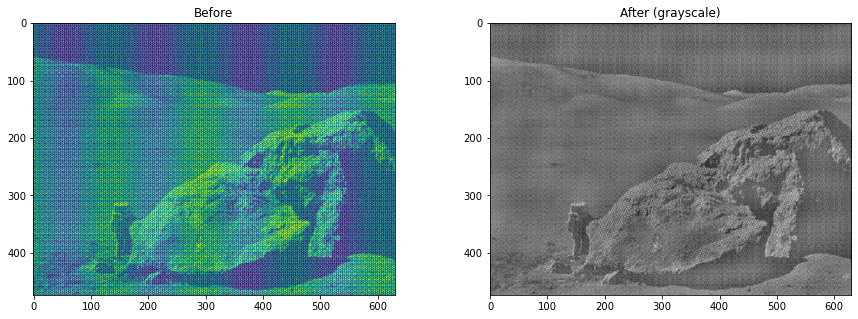

In [14]:

# create an empty complex array with the shape of the input image
fft_img_shift_mod = np.empty(radius.shape, dtype=complex)

# insert back the phase information
fft_img_shift_mod.real = radius*np.cos(phases)
fft_img_shift_mod.imag = radius*np.sin(phases)

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift_mod)
#fft_img_mod=fft_img_shift_mod
# inverse fourier transform
img_mod = np.fft.ifft2(fft_img_mod)

#realpart to pass to image
img_mod = np.real(img_mod)


fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].imshow(image)
axs[0].title.set_text('Before')
axs[1].imshow(img_mod, cmap='gray')
axs[1].title.set_text('After (grayscale)')
plt.show()




